## Imports

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [15]:
PATH = '/Users/hitesh/CSCI566/swarm-guard/dataset'
train_path = os.path.join(PATH, 'train')
test_path = os.path.join(PATH, 'test')

In [16]:
def extract_tweet_texts(train_path):
    rows = []
    for filename in os.listdir(train_path):
        if filename.endswith('.json'):
            file_path = os.path.join(train_path, filename)
            
            try:
                with open(file_path, 'r', encoding='utf-8') as F:
                    data = json.load(F)
                    for node in data.get('nodes', []):
                        row = {
                            'id': node.get('id'),
                            'user_id': node.get('user_id'),
                            'tweet_text': node.get('tweet_text', '')
                        }
                        rows.append(row)
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    
    return pd.DataFrame(rows, columns=['id', 'user_id', 'tweet_text'])

train_df = extract_tweet_texts(train_path)
test_df = extract_tweet_texts(test_path)

### Train analysis

In [17]:
print(f'Shape{train_df.shape}')
print(f'{train_df.isnull().sum()}')
print(f'Duplicates: {train_df.duplicated().sum()}')
train_df['tweet_length'] = train_df['tweet_text'].apply(len) # shows len column
train_df['tweet_length'].describe()

display(train_df)


Shape(285357, 3)
id            0
user_id       0
tweet_text    0
dtype: int64
Duplicates: 0


,id,user_id,tweet_text,tweet_length
0,1003944490459992064,363056675,Metal acceleration coming to @TensorFlow later...,119
1,1004009317266149377,274821510,RT @DamienPontifex: Metal acceleration coming ...,139
2,1004035752831922177,822158058453434368,RT @DamienPontifex: Metal acceleration coming ...,139
3,1004035853210079232,1398654900,RT @DamienPontifex: Metal acceleration coming ...,139
4,1004087144049201152,197507094,RT @DamienPontifex: Metal acceleration coming ...,139
...,...,...,...,...
285352,1061267038688038912,1039587995475562496,RT @kaizz08: One hundred percent happy ako par...,139
285353,1061286915754708992,4011849252,RT @kaizz08: One hundred percent happy ako par...,139
285354,1061362870548541440,4842450781,RT @kaizz08: One hundred percent happy ako par...,139
285355,1061384262815895552,802026792231976961,RT @kaizz08: One hundred percent happy ako par...,139


### Test Analysis

In [18]:
print(f'Test Shape{test_df.shape}')
print(f'{test_df.isnull().sum()}')
print(f'Duplicates: {test_df.duplicated().sum()}')
test_df['tweet_length'] = test_df['tweet_text'].apply(len) # shows len column
test_df['tweet_length'].describe()

display(test_df)


Test Shape(140287, 3)
id            0
user_id       0
tweet_text    0
dtype: int64
Duplicates: 0


,id,user_id,tweet_text,tweet_length
0,979011254915387394,22708797,New data from the US Department of Education b...,134
1,979011295818199040,869967070984851457,RT @HarvardHealth: New data from the US Depart...,139
2,979011720378232833,1211059848,RT @HarvardHealth: New data from the US Depart...,139
3,979012854790664195,771062126,RT @HarvardHealth: New data from the US Depart...,139
4,979014306690977794,1382606287,RT @HarvardHealth: New data from the US Depart...,139
...,...,...,...,...
140282,1052523784434065409,818442545848061952,RT @BlueSea1964: 🚨 Oops! Hillary Clinton Swoop...,140
140283,1052548009383354368,41150100,RT @BlueSea1964: 🚨 Oops! Hillary Clinton Swoop...,140
140284,1052589638727159808,4880023101,RT @BlueSea1964: 🚨 Oops! Hillary Clinton Swoop...,140
140285,1052619044858269697,154361364,RT @BlueSea1964: 🚨 Oops! Hillary Clinton Swoop...,140


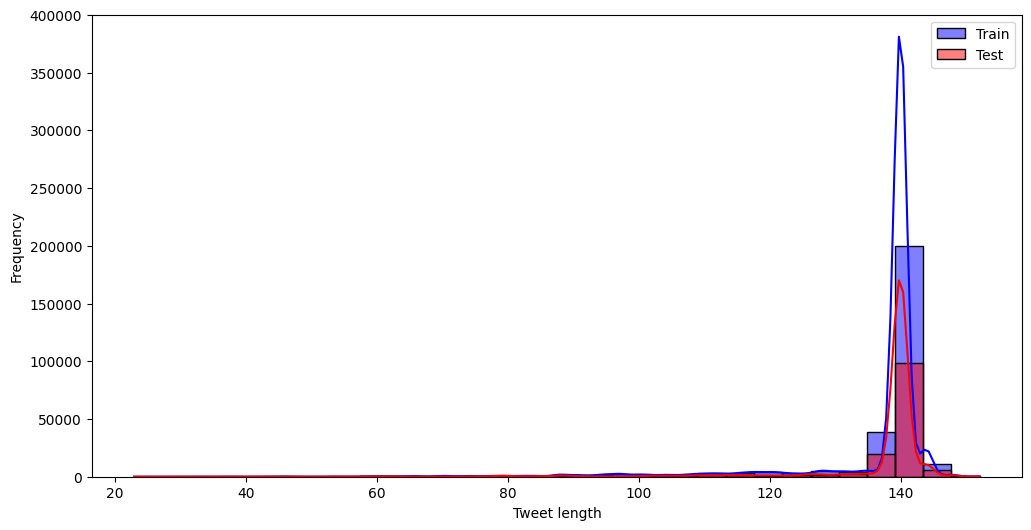

In [19]:
# distribution of tweet lengths for both train and test datasets
plt.figure(figsize=(12, 6))
sns.histplot(train_df['tweet_length'], bins=30, kde=True, color='blue', label='Train')
sns.histplot(test_df['tweet_length'], bins=30, kde=True, color='red', label='Test')
plt.xlabel('Tweet length')
plt.ylabel('Frequency')
plt.legend()

plt.show()